In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = catalog.load("MICRODADOS_ENEM")

[01/14/23 18:27:39] INFO     Loading data from 'MICRODADOS_ENEM' (ParquetDataSet)...            ]8;id=458502;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=93212;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_MUNICIPIO_ESC,TP_PRESENCA_MT,TP_ESCOLA,TP_ENSINO,NU_NOTA_MT
0,210053865474,2021,1,0,NaN,0.0,1,NaN,NaN
1,210052384164,2021,1,0,NaN,1.0,1,NaN,461.5
2,210052589243,2021,1,0,NaN,0.0,1,NaN,NaN
3,210052128335,2021,2,0,2304202.0,1.0,2,1.0,659.5
4,210051353021,2021,2,0,2311603.0,1.0,2,1.0,582.6


In [4]:
id_cols = ["NU_INSCRICAO", "NU_ANO"]

In [5]:
flag_cols = ["TP_ST_CONCLUSAO", "IN_TREINEIRO", "CO_MUNICIPIO_ESC", "TP_PRESENCA_MT", "TP_ESCOLA", "TP_ENSINO"]

In [6]:
calc_cols = ["NU_NOTA_MT"]

In [7]:
filtered_df = df.query("TP_PRESENCA_MT == 1")

# Distribuição populacional

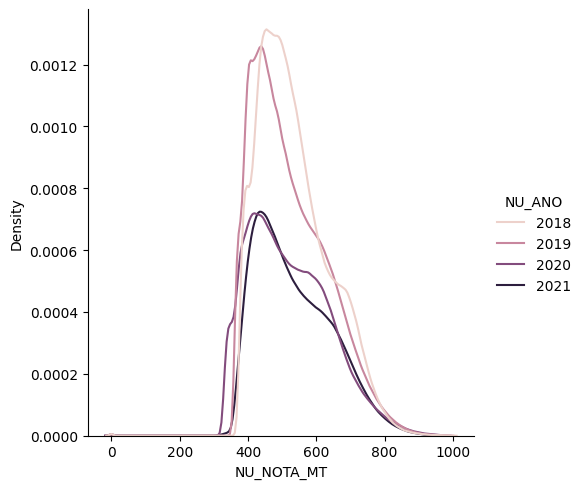

In [8]:
sns.displot(data=filtered_df, x="NU_NOTA_MT", kind="kde", hue="NU_ANO");

In [9]:
filtered_df.groupby("NU_ANO")["NU_NOTA_MT"].describe()

,count,mean,std,min,25%,50%,75%,max
NU_ANO,,,,,,,,
2018,3905085.0,535.405276,103.150900,0.0,455.3,516.6,600.7,996.1
2019,3710335.0,523.124060,109.062957,0.0,435.1,501.1,597.8,985.5
2020,2597440.0,520.578335,117.305453,0.0,425.8,505.1,602.3,975.0
2021,2245844.0,535.080186,110.626652,0.0,444.7,515.4,613.9,953.1


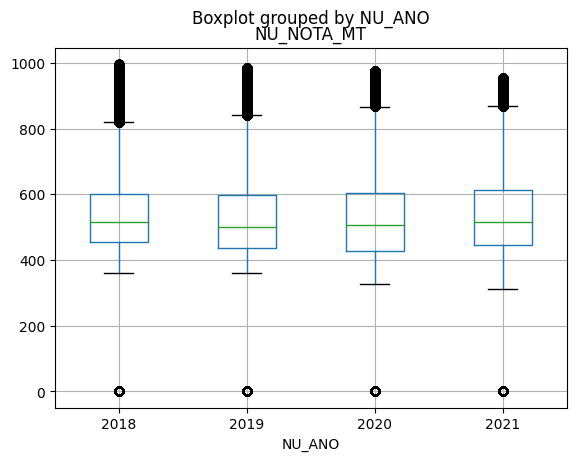

In [10]:
filtered_df.boxplot(column="NU_NOTA_MT", by="NU_ANO")

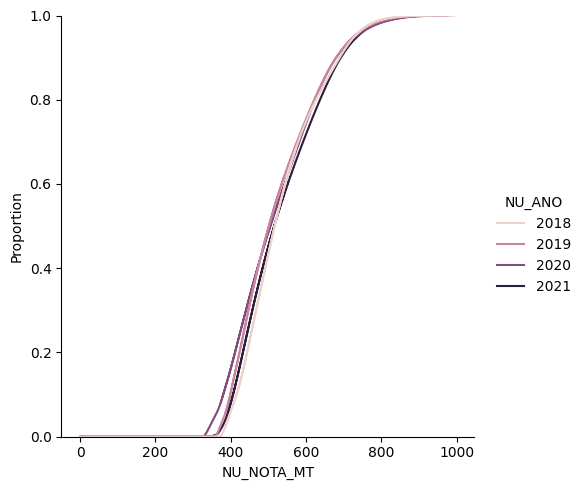

In [11]:
sns.displot(data=filtered_df, x="NU_NOTA_MT", kind="ecdf", hue="NU_ANO");

# Distribuição amostral de 2021 a 2018

In [12]:
from scipy.stats import ttest_ind

In [13]:
sample_2021 = np.random.choice(filtered_df.query("NU_ANO == 2021")["NU_NOTA_MT"].values, size=(50000, 1000))
sample_2020 = np.random.choice(filtered_df.query("NU_ANO == 2020")["NU_NOTA_MT"].values, size=(50000, 1000))
sample_2019 = np.random.choice(filtered_df.query("NU_ANO == 2019")["NU_NOTA_MT"].values, size=(50000, 1000))
sample_2018 = np.random.choice(filtered_df.query("NU_ANO == 2018")["NU_NOTA_MT"].values, size=(50000, 1000))

In [14]:
mean_sample_2021 = sample_2021.mean(axis=1)

In [15]:
mean_sample_2020 = sample_2020.mean(axis=1)

In [16]:
mean_sample_2019 = sample_2019.mean(axis=1)

In [17]:
mean_sample_2018 = sample_2018.mean(axis=1)

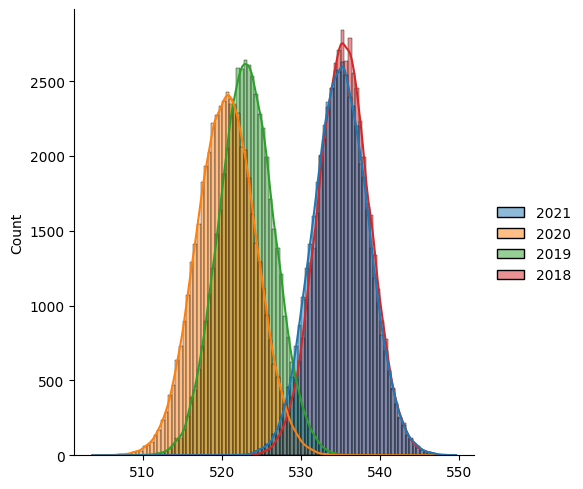

In [18]:
mean_samples = pd.DataFrame({
        '2021': mean_sample_2021,
        '2020': mean_sample_2020,
        '2019': mean_sample_2019,
        '2018': mean_sample_2018
})

sns.displot(
    data=mean_samples,
    kde=True
);

In [19]:
mean_samples.describe()

,2021,2020,2019,2018
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,535.041765,520.551910,523.117227,535.408385
std,3.489767,3.714303,3.444114,3.284534
min,520.704000,503.677500,509.472500,522.137300
25%,532.680050,518.015200,520.786825,533.179175
50%,535.030500,520.567850,523.098150,535.392000
75%,537.395575,523.082025,525.437350,537.603050
max,549.585100,535.332200,538.202200,549.249100


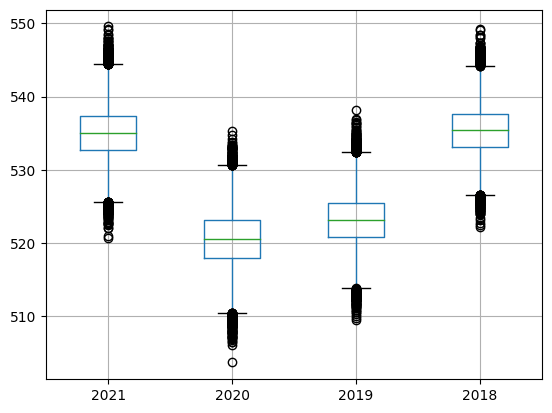

In [20]:
mean_samples.boxplot()

# Testes de hipóteses

### 2021 vs. 2019

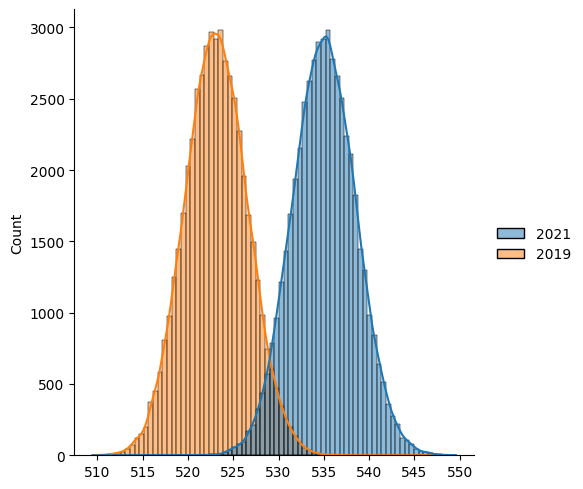

In [21]:
sns.displot(
    data=pd.DataFrame({'2021': mean_sample_2021, '2019': mean_sample_2019}),
    kde=True
);

In [22]:
ttest_ind(mean_sample_2021, mean_sample_2019, equal_var=False, alternative='greater') 

Ttest_indResult(statistic=543.8207437152116, pvalue=0.0)

$H_0$: $\mu_{2021} \leq \mu_{2019}$

$H_1$: $\mu_{2021} > \mu_{2019}$

$pvalue=0.0 \leq 0.05$ portanto, rejeita-se $H_0$

### 2021 vs. 2020

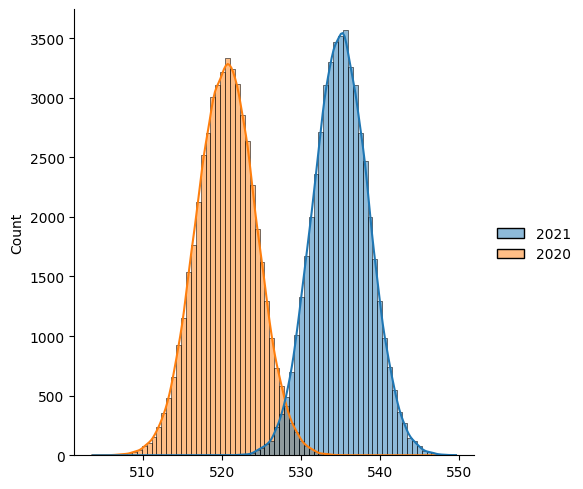

In [23]:
sns.displot(
    data=pd.DataFrame({'2021': mean_sample_2021, '2020': mean_sample_2020}),
    kde=True
);

In [24]:
ttest_ind(mean_sample_2021, mean_sample_2020, equal_var=False, alternative='greater')

Ttest_indResult(statistic=635.733801986235, pvalue=0.0)

$H_0$: $\mu_{2021} \leq \mu_{2020}$

$H_1$: $\mu_{2021} > \mu_{2020}$

$pvalue=0.0 \leq 0.05$ portanto, rejeita-se $H_0$

### 2021 vs. 2018

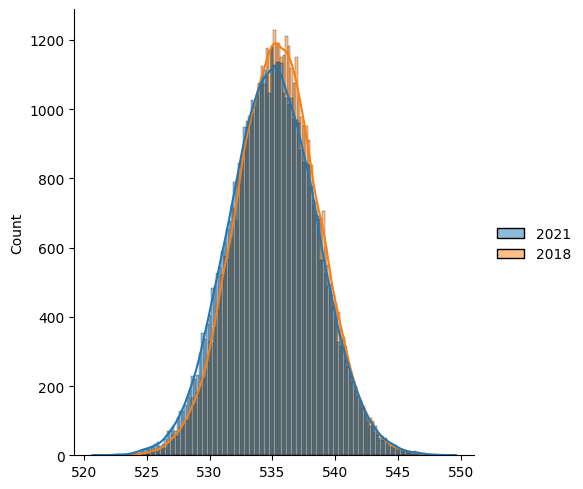

In [25]:
sns.displot(
    data=pd.DataFrame({'2021': mean_sample_2021, '2018': mean_sample_2018}),
    kde=True
);

In [26]:
ttest_ind(mean_sample_2021, mean_sample_2018, equal_var=False, alternative='greater')

Ttest_indResult(statistic=-17.106181519378392, pvalue=1.0)

$H_0$: $\mu_{2021} \leq \mu_{2018}$

$H_1$: $\mu_{2021} > \mu_{2018}$

$pvalue=0.99 \geq 0.05$ portanto, não se rejeita $H_0$

### 2019 vs. 2020

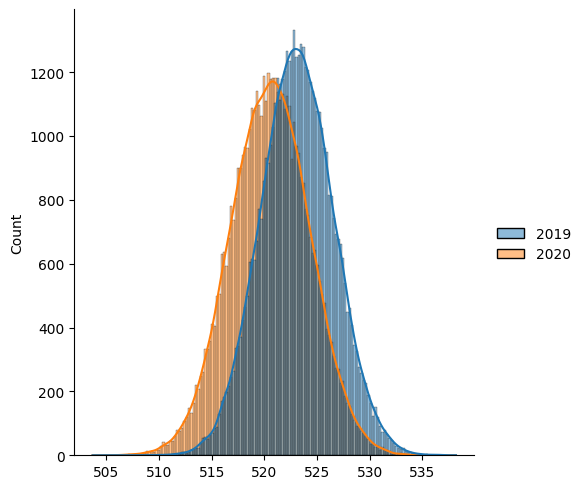

In [27]:
sns.displot(
    data=pd.DataFrame({'2019': mean_sample_2019, '2020': mean_sample_2020}),
    kde=True
);

In [28]:
ttest_ind(mean_sample_2019, mean_sample_2020, equal_var=False, alternative='greater')

Ttest_indResult(statistic=113.24393358566942, pvalue=0.0)

$H_0$: $\mu_{2019} \leq \mu_{2020}$

$H_1$: $\mu_{2019} > \mu_{2020}$

$pvalue=0.0 \leq 0.05$ portanto, rejeita-se $H_0$